### Model Training

This notebook is dedicated to training LogisticRegression machine learning models to predict `late_delivery_risk`. The primary objectives of this notebook are:

- **Model Training**: Building and training the Logistic Regression model.
- **Hyperparameter Tuning**: Optimizing model parameters to achieve the best possible performance.
- **Performance Evaluation**: Assessing the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
- **Cross-Validation**: Evaluating the model's robustness and generalization using k-fold cross-validation.

By the end of this notebook, we will have:

- A trained and evaluated model for predicting `late_delivery_risk`.
- Insights into the most impactful features contributing to the predictions.

**Note**:

- Some cells are commented out due to their time-consuming nature. Results from these cells are provided as images for reference.
- Feature selection is based on the correlation coefficient with the target variable. For more details, refer to the correlation matrix in the `data_cleaning.ipynb` notebook.
- For an overview of the dataset and exploratory data analysis, refer to the `eda.ipynb` notebook.

**🚨 Check the `README.me` before continuing with this notebook**

In [ ]:
# Standard libraries
import pandas as pd

# Enable auto-reload for modules during development
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# sklearn modules
from sklearn.linear_model import LogisticRegression

# Custom modules
from scripts import models_training as cm

In [3]:
# Load the dataset (check data_cleaning.ipynb for details in the data cleaning process)
path = "../../data/df_ml.csv"
data = pd.read_csv(path)
dataframe = data.copy()

In [4]:
# Lets recheck the dataframe
dataframe.head()

,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,customer_zipcode,latitude,longitude,order_item_discount,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,product_price,year_order,hour_order,day_order,month_order,day_of_week_order,type_cash,type_debit,type_payment,type_transfer,customer_country_ee._uu.,customer_country_puerto_rico,customer_segment_consumer,customer_segment_corporate,customer_segment_home_office,department_name_apparel,department_name_book_shop,department_name_discs_shop,department_name_fan_shop,department_name_fitness,department_name_footwear,department_name_golf,department_name_health_and_beauty_,department_name_outdoors,department_name_pet_shop,department_name_technology,market_africa,market_europe,market_latam,market_pacific_asia,market_usca,shipping_mode_first_class,shipping_mode_same_day,shipping_mode_second_class,shipping_mode_standard_class
0,4,88.790001,239.979996,0,28601,35.776661,-81.362625,60.0,0.20,0.37,1,299.980011,2015,0,1,1,4,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,4,36.470001,107.889999,0,60625,41.832722,-87.980484,22.1,0.17,0.34,1,129.990005,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,4,91.180000,193.990005,0,60625,41.832722,-87.980484,6.0,0.03,0.47,1,199.990005,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,68.250000,227.500000,0,60625,41.832722,-87.980484,22.5,0.09,0.30,5,50.000000,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,4.100000,40.980000,1,78240,29.520010,-98.637413,9.0,0.18,0.10,2,24.990000,2015,1,1,1,4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


# LogisticRegression

In [6]:
model_to_test = LogisticRegression

## Base Model

In [7]:
# Selecting features 
correlated_columns = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.00001)

Features with correlation coefficient with target > than 1e-05
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'type_debit', 'type_payment', 'type_cash', 'market_europe', 'department_name_pet_shop', 'department_name_outdoors', 'customer_zipcode', 'month_order', 'market_pacific_asia', 'customer_segment_home_office', 'department_name_fitness', 'department_name_book_shop', 'day_of_week_order', 'customer_country_ee._uu.', 'department_name_health_and_beauty_', 'latitude', 'order_item_discount_rate', 'department_name_technology', 'order_item_quantity', 'market_usca', 'customer_segment_consumer', 'department_name_golf', 'department_name_footwear', 'order_item_discount', 'department_name_discs_shop', 'department_name_fan_shop', 'department_name_apparel', 'customer_country_puerto_rico', 'market_africa', 'customer_segment_corporate', 'longitude', 'day_order', 'year_order', 'product_price', 'order_item_profit_ratio', 'benefit_

In [8]:
# Splitting the data
X_train, X_test, y_train, y_test = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns, test_size=0.2)

Test size 20%:
Training set size: 144412 | Test set size: 36104


In [9]:
# Train the model 
results_list, model_tree = cm.train_model(X_train, X_test, y_train, y_test, model_name = model_to_test)

Logistic Regression initialized.
Model Metrics: | Accuracy = 0.5674 | Precision = 0.5846 | Recall = 0.7306 | F1-score = 0.6495 |
Confusion Matrix: 
[[ 6017 10281]
 [ 5336 14470]]

The model performs poorly. Consider feature selection or hyperparameter tuning.



In [11]:
# Evaluating different test_size and features
results_df = cm.evaluate_different_correlations(dataframe, 'late_delivery_risk', model = model_to_test)

Features with correlation coefficient with target > than 1e-05
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'type_debit', 'type_payment', 'type_cash', 'market_europe', 'department_name_pet_shop', 'department_name_outdoors', 'customer_zipcode', 'month_order', 'market_pacific_asia', 'customer_segment_home_office', 'department_name_fitness', 'department_name_book_shop', 'day_of_week_order', 'customer_country_ee._uu.', 'department_name_health_and_beauty_', 'latitude', 'order_item_discount_rate', 'department_name_technology', 'order_item_quantity', 'market_usca', 'customer_segment_consumer', 'department_name_golf', 'department_name_footwear', 'order_item_discount', 'department_name_discs_shop', 'department_name_fan_shop', 'department_name_apparel', 'customer_country_puerto_rico', 'market_africa', 'customer_segment_corporate', 'longitude', 'day_order', 'year_order', 'product_price', 'order_item_profit_ratio', 'benefit_

In [12]:
# A resume of metrics for test_size and features
results_df.head(55)

,Correlation Coefficient ≥,Test Size (%),Accuracy,Precision,Recall,F1-score
0,0.00001,0.3,0.552156,0.551574,0.990257,0.708508
1,0.00001,0.2,0.567444,0.584623,0.730587,0.649505
2,0.00001,0.1,0.586528,0.613785,0.650844,0.631771
3,0.01000,0.3,0.707174,0.857304,0.560524,0.677853
4,0.01000,0.2,0.708536,0.855045,0.564374,0.679948
5,0.01000,0.1,0.707955,0.849189,0.564342,0.678065
6,0.02000,0.3,0.707525,0.857444,0.561162,0.678363
7,0.02000,0.2,0.709063,0.855255,0.565334,0.680710
8,0.02000,0.1,0.707955,0.849189,0.564342,0.678065
9,0.03000,0.3,0.708005,0.857634,0.562036,0.679061


According to these results, increasing the correlation coefficient threshold for feature selection improves the model's accuracy. This outcome aligns with the behavior of the model, which is sensitive to irrelevant features. By filtering out less relevant features, the model focuses on the most impactful variables, leading to better performance. Features with a correlation coefficient lower than 0.04 will be removed.

In [13]:
# Selecting features with correlation coefficient > 0.04
correlated_columns = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.04)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 



In [14]:
# Splitting the data
X_train, X_test, y_train, y_test = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns, test_size=0.2)

Test size 20%:
Training set size: 144412 | Test set size: 36104


In [15]:
# Train the model 
results_list, model_tree = cm.train_model(X_train, X_test, y_train, y_test, model_name = model_to_test)

Logistic Regression initialized.
Model Metrics: | Accuracy = 0.7091 | Precision = 0.8553 | Recall = 0.5654 | F1-score = 0.6808 |
Confusion Matrix: 
[[14403  1895]
 [ 8608 11198]]

The model is moderately good but could be improved.



In [16]:
# Cross validation
results, average = cm.cross_validate_model(dataframe, correlated_columns, 'late_delivery_risk', model = model_to_test)
results

Cross-Validation Results:
Number of folds: 5
Average Training Accuracy:  0.7096
Average Test Accuracy:  0.7095
The model performs moderately well, but there's room for improvement in its generalization.



,Fold,Train Accuracy,Test Accuracy,Train F1,Test F1
0,1,0.7113,0.7091,0.7067,0.7043
1,2,0.7099,0.7072,0.7052,0.7021
2,3,0.7099,0.7071,0.7051,0.7024
3,4,0.7100,0.7141,0.7054,0.7093
4,5,0.7071,0.7102,0.7020,0.7057


Based on the 5-fold cross-validation results, the model demonstrates high stability. The average train accuracy is 70.96%, and the average test accuracy is 70.95%, indicating consistent performance across different data splits. This stability suggests that the model generalizes well to unseen data and is not overfitting.

🚨The 2 below above are commented out as the GridSearch process is time-consuming. Below, you can find an image showcasing the results.

![Hyperparameters Tunning](./images/hyperparameter_tunning_logistic_regression.png)
![Hyperparameters Tunning based on correlation](./images/hyperparameter_tunning_logistic_regression_based_on_correlation_coefficient.png)

In [17]:
# Hyperparameter tuning
#results_df = cm.perform_grid_search(dataframe, 'late_delivery_risk', model = model_to_test)

In [18]:
#results_df

In [19]:
#Best parameters for LogisticRegression
best_parameters = {'C': 0.001, 'class_weight': None, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
best_correlation = 0.04
best_test_size = 0.2
final_model = model_to_test(**best_parameters)

correlated_columns = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=best_correlation)
X_train, X_test, y_train, y_test = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns, test_size=best_test_size)
results_list, final_model = cm.train_model(X_train, X_test, y_train, y_test, model_name=model_to_test, model_tree=final_model)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 

Test size 20%:
Training set size: 144412 | Test set size: 36104
Model Metrics: | Accuracy = 0.7116 | Precision = 0.852 | Recall = 0.5741 | F1-score = 0.686 |
Confusion Matrix: 
[[14323  1975]
 [ 8436 11370]]

The model is moderately good but could be improved.



In [20]:
# Applying feature selection using Recursive Feature Elimination (RFE) with different numbers of features
# If accuracy improves, update the final model

# Initialize the best model and accuracy
best_accuracy = final_model.score(X_test, y_test)
best_model = final_model
best_correlated_columns = correlated_columns

for f in [3, 5]:
    correlated_columns_f, final_model_f, accuracy_f = cm.feature_selection(final_model, X_train, X_test, y_train, y_test, features = f)

    # Update best model if accuracy improves
    if accuracy_f > best_accuracy:
        best_accuracy = accuracy_f
        best_model = final_model_f
        best_correlated_columns = correlated_columns_f

# Save the best model and correlated columns
final_model = best_model
correlated_columns = best_correlated_columns

print("="*50)
print(f"Best accuracy: {best_accuracy}")
print(f"Best correlated columns: {correlated_columns}")


Selected Features: Index(['shipping_mode_first_class', 'shipping_mode_second_class',
       'shipping_mode_standard_class'],
      dtype='object')
 Model Metrics: | Accuracy = 0.6937 | Precision = 0.7416 | Recall = 0.6937 | F1 Score = 0.6873
 Confusion Matrix:
 [[14403  1895]
 [ 9162 10644]]

The model is moderately good, but there is room for improvement.

Selected Features: Index(['shipping_mode_first_class', 'shipping_mode_second_class',
       'shipping_mode_same_day', 'type_transfer',
       'shipping_mode_standard_class'],
      dtype='object')
 Model Metrics: | Accuracy = 0.6937 | Precision = 0.7416 | Recall = 0.6937 | F1 Score = 0.6873
 Confusion Matrix:
 [[14403  1895]
 [ 9162 10644]]

The model is moderately good, but there is room for improvement.

Best accuracy: 0.7116385996011523
Best correlated columns: ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard

In [21]:
# Cross validation
results, average = cm.cross_validate_model(dataframe, correlated_columns, 'late_delivery_risk', model = final_model, trained_model = True)
results

Cross-Validation Results:
Number of folds: 5
Average Training Accuracy:  0.7139
Average Test Accuracy:  0.7138
The model performs moderately well, but there's room for improvement in its generalization.



,Fold,Train Accuracy,Test Accuracy,Train F1,Test F1
0,1,0.7141,0.7116,0.7100,0.7074
1,2,0.7139,0.7123,0.7099,0.7079
2,3,0.7142,0.7112,0.7101,0.7072
3,4,0.7133,0.7167,0.7093,0.7125
4,5,0.7141,0.7173,0.7098,0.7135


### Results

The Logistic Regression model achieved the following performance metrics:

- **Cross-Validation Results**:
    - Average Train Accuracy: **71.39%**
    - Average Test Accuracy: **71.38%**
    - These results indicate that the model generalizes well across different data splits, with consistent performance on both training and test sets.

- **Best Model Performance**:
    - Best Accuracy: **71.16%**
    - Best Correlation Coefficient Threshold: **0.04**
    - Features: `shipping_mode_first_class`,`shipping_mode_second_class`,`hour_order`,`shipping_mode_same_day`,`type_transfer`,`days_for_shipment_scheduled`, `shipping_mode_standard_class`
    - Best Test Size: **20%**
    - Best Parameters: 
        - `C`: 0.001
        - `class_weight`: None
        - `fit_intercept`: False
        - `max_iter`: 100
        - `penalty`: l2
        - `solver`: lbfgs
        - `tol`: 0.01

- **Confusion Matrix**:
    The confusion matrix for the best model is as follows:
    ```
    [[14323,  1975],
     [ 8436, 11370]]
    ```
    - True Positives: 11,370
    - True Negatives: 14,323
    - False Positives: 1,975
    - False Negatives: 8,436

- **Evaluation Metrics**:
    - Precision: **85.20%**
    - Recall: **57.41%**
    - F1-Score: **68.60%**

- **Comments on Results**:

The model demonstrates a good balance between precision and recall, with a relatively high precision indicating that most predicted positive cases are correct. However, the recall is slightly lower, suggesting that some true positive cases are missed. The F1-score reflects this trade-off, providing a harmonic mean of precision and recall.

The cross-validation results confirm the model's stability and robustness, as the train and test accuracies are closely aligned. The selected features and hyperparameters contribute to the model's performance, with the correlation coefficient threshold of 0.04 effectively filtering out less relevant features.

Overall, the model performs well in predicting `late_delivery_risk`, but there is room for improvement in recall, which could be addressed by exploring alternative feature selection methods (that are explored bellow) or hyperparameter tuning strategies.

## Features transformation

### PCA

In [22]:
# Selecting features 
correlated_columns_pca = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.04)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 



In [23]:
# Splitting the data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns_pca, test_size=0.2, transform = True, transform_type = 'pca')

Applying transformation: pca...
Test size 20%:
Training set size: 144412 | Test set size: 36104


In [24]:
# Train the model
results_list, model_tree_pca = cm.train_model(X_train_pca, X_test_pca, y_train_pca, y_test_pca, model_name = model_to_test)

Logistic Regression initialized.
Model Metrics: | Accuracy = 0.6889 | Precision = 0.7964 | Recall = 0.5816 | F1-score = 0.6723 |
Confusion Matrix: 
[[13354  2944]
 [ 8287 11519]]

The model is moderately good but could be improved.



🚨The 2 cells below are commented out as the GridSearch process is time-consuming. Below, you can find an image showcasing the results.

![Hyperparameters Tunning with PCA](./images/hyperparameter_tunning_logistic_regression_pca.png)
![Hyperparameters Tunning based on correlation with PCA](./images/hyperparameter_tunning_logistic_regression_based_on_correlation_coefficient_pca.png)

In [25]:
# Hyperparameter tuning
#results_df = cm.perform_grid_search(dataframe, 'late_delivery_risk', model = model_to_test, transform = True, transform_type = 'pca')

In [26]:
#results_df

In [27]:
#Best parameters for LogisticRegression with PCA
best_parameters = {'C': 0.001, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
best_correlation = 0.04
best_test_size = 0.2
final_model_pca = model_to_test()

correlated_columns_pca = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=best_correlation)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns_pca, test_size=best_test_size, transform = True, transform_type = 'pca')
results_list, final_model_pca = cm.train_model(X_train_pca, X_test_pca, y_train_pca, y_test_pca, model_name=model_to_test, model_tree=final_model_pca)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 

Applying transformation: pca...
Test size 20%:
Training set size: 144412 | Test set size: 36104
Model Metrics: | Accuracy = 0.6889 | Precision = 0.7964 | Recall = 0.5816 | F1-score = 0.6723 |
Confusion Matrix: 
[[13354  2944]
 [ 8287 11519]]

The model is moderately good but could be improved.



#### PCA Transformation Results

The PCA transformation did not enhance the model's performance. Despite reducing dimensionality, the accuracy and other evaluation metrics did not improve respect to original feature set. This suggests that the selected features already capture the most relevant information for predicting `late_delivery_risk`, and further dimensionality reduction through PCA was not beneficial in this case.

### MinMax

In [28]:
# Selecting features 
correlated_columns_mm = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.04)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 



In [29]:
# Splitting the data
X_train_mm, X_test_mm, y_train_mm, y_test_mm = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns_mm, test_size=0.2, transform = True, transform_type = 'minmax')

Applying transformation: minmax...
Test size 20%:
Training set size: 144412 | Test set size: 36104


In [30]:
# Train the model
results_list, model_tree_mm = cm.train_model(X_train_mm, X_test_mm, y_train_mm, y_test_mm, model_name = model_to_test)

Logistic Regression initialized.
Model Metrics: | Accuracy = 0.7091 | Precision = 0.8553 | Recall = 0.5654 | F1-score = 0.6808 |
Confusion Matrix: 
[[14403  1895]
 [ 8608 11198]]

The model is moderately good but could be improved.



🚨The 2 cells below are commented out as the GridSearch process is time-consuming. Below, you can find an image showcasing the results.

![Hyperparameters Tunning with MinMAx](./images/hyperparameter_tunning_logistic_regression_minmax.png)
![Hyperparameters Tunning based on correlation with MinMax](./images/hyperparameter_tunning_logistic_regression_based_on_correlation_coefficient_minmax.png)

In [31]:
# Hyperparameter tuning
#results_df = cm.perform_grid_search(dataframe, 'late_delivery_risk', model = model_to_test, transform = True, transform_type = 'minmax')

In [32]:
#results_df

In [33]:
#Best parameters
best_parameters = {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
best_correlation = 0.04
best_test_size = 0.2
final_model_mm = model_to_test()

correlated_columns_mm = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=best_correlation)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns_mm, test_size=best_test_size, transform = True, transform_type = 'minmax')
results_list, final_model_mm = cm.train_model(X_train_mm, X_test_mm, y_train_mm, y_test_mm, model_name=model_to_test, model_tree=final_model_mm)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 

Applying transformation: minmax...
Test size 20%:
Training set size: 144412 | Test set size: 36104
Model Metrics: | Accuracy = 0.7091 | Precision = 0.8553 | Recall = 0.5654 | F1-score = 0.6808 |
Confusion Matrix: 
[[14403  1895]
 [ 8608 11198]]

The model is moderately good but could be improved.



#### MinMax Transformation Results

The MinMax transformation maintained the model's performance, achieving consistent accuracy and evaluation metrics. The scaling process ensured that all features contributed equally to the model, avoiding dominance by features with larger ranges. However, the recall remains an area for improvement, indicating that some true positive cases are still being missed.

### Transformation Results

The results obtained after applying transformations such as PCA and MinMax scaling did not significantly improve the model's performance compared to the original feature set. This indicates that the selected features already capture the most relevant information for predicting `late_delivery_risk`, and further transformations were not beneficial in this case.

## Model Evaluation

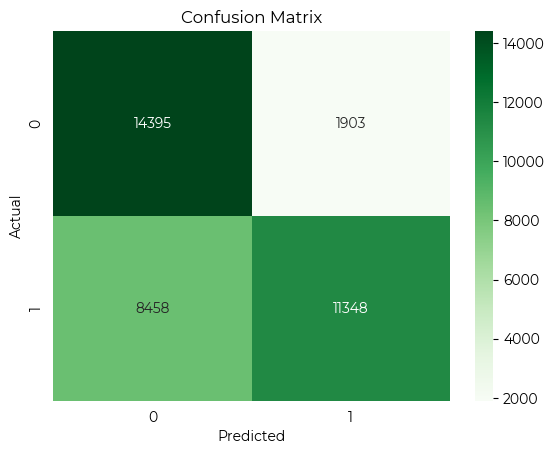

In [38]:
# Confusion Matrix
cm.confusion_matrix_plot(final_model, X_test, y_test, correlated_columns)

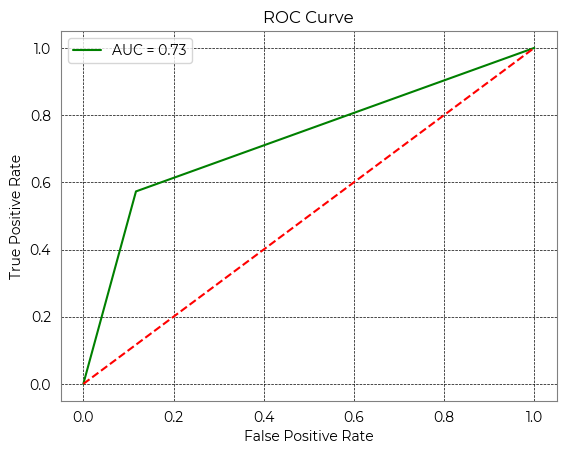

In [42]:
# ROC Curve
cm.roc_curve_plot(final_model, X_test, y_test, correlated_columns)